# **Import library & dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


# **Cleaning dataset**

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **Visualisasi data**

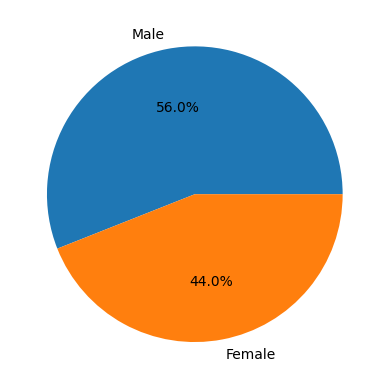

In [ ]:
plt.pie(data['Gender'].value_counts(), labels=data['Gender'].unique(), autopct='%1.1f%%')
plt.show()

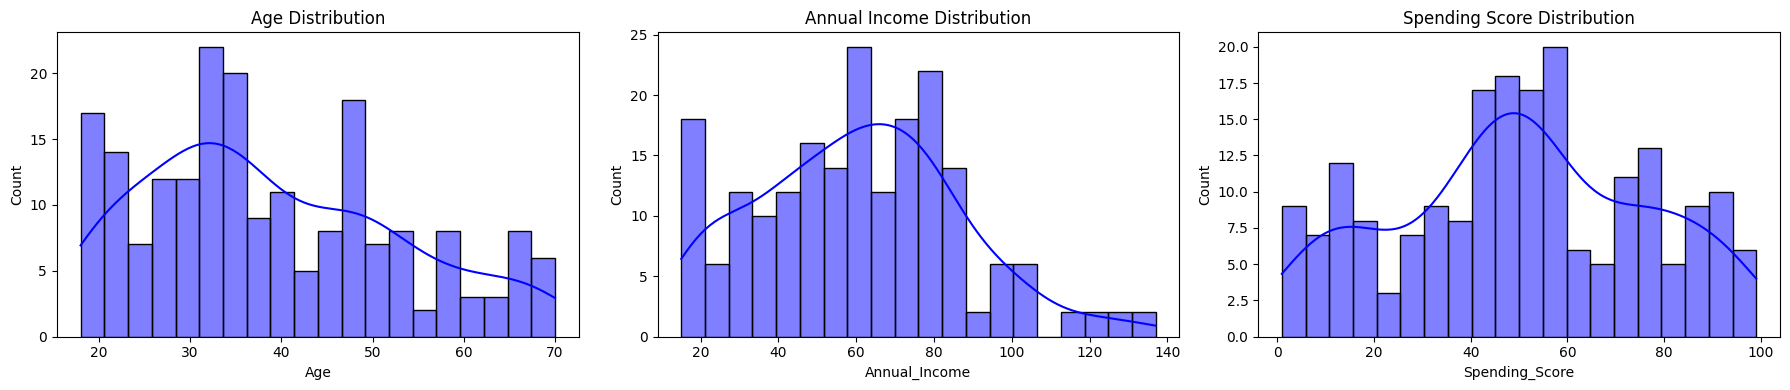

In [ ]:
plt.figure(figsize=(18, 4))

# Plot 1: Age
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="Age", kde=True, bins=20, color='blue')
plt.title("Age Distribution")

# Plot 2: Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data=data, x="Annual_Income", kde=True, bins=20, color='blue')
plt.title("Annual Income Distribution")

# Plot 3: Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data=data, x="Spending_Score", kde=True, bins=20, color='blue')
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.show()


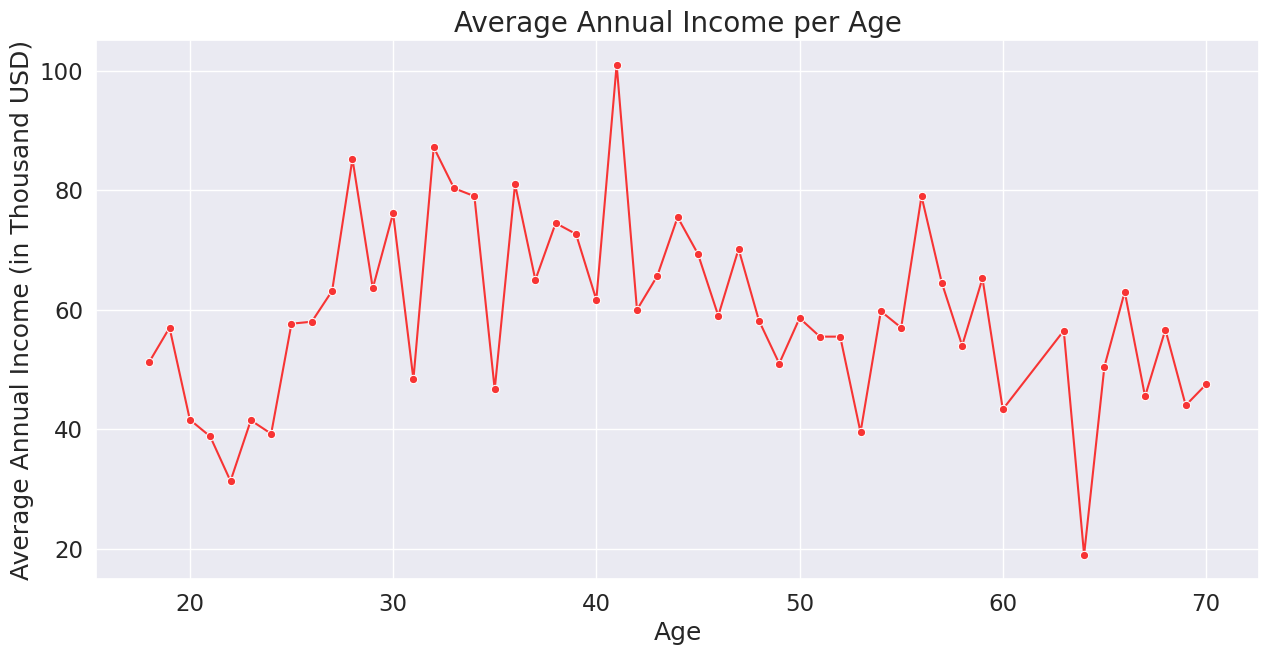

In [ ]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
avg_income = data.groupby('Age')['Annual_Income'].mean().reset_index()
sns.lineplot(data=avg_income, x='Age', y='Annual_Income', marker='o', color='#f73434')
plt.xlabel('Age')
plt.ylabel('Average Annual Income (in Thousand USD)')
plt.title('Average Annual Income per Age', fontsize=20)
plt.show()



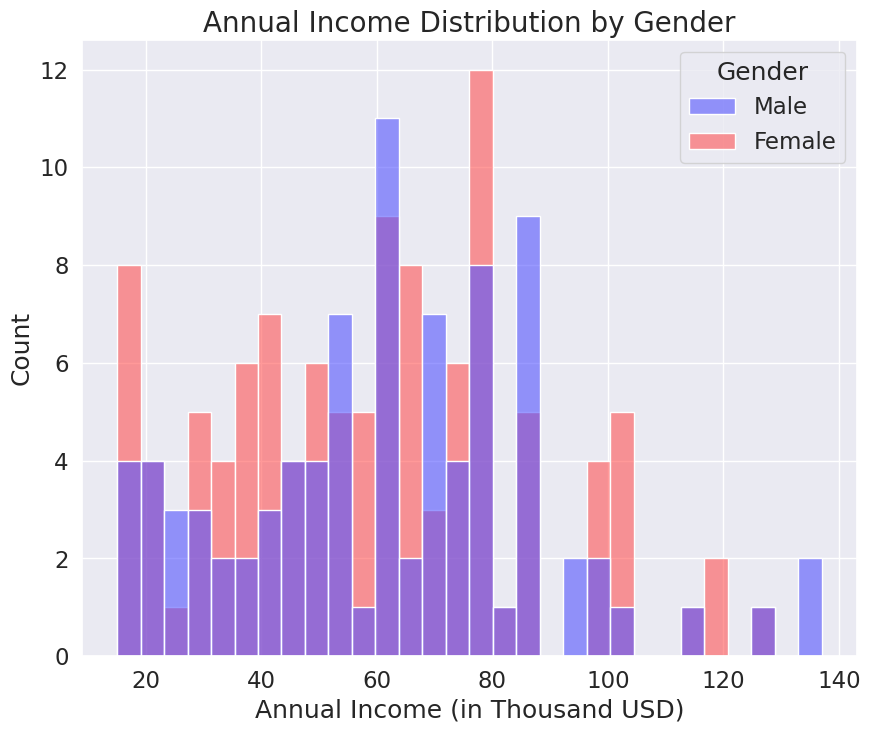

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.histplot(data=data, x='Annual_Income', hue='Gender', palette='seismic', bins=30, alpha=0.6, multiple='layer')
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Count')
plt.title('Annual Income Distribution by Gender', fontsize=20)
plt.show()

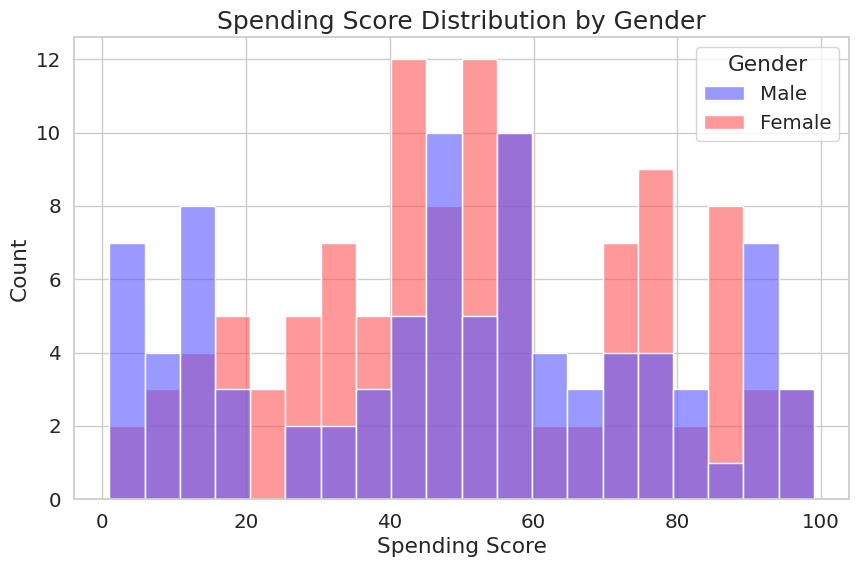

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", font_scale=1.3)
sns.histplot(data=data, x='Spending_Score', hue='Gender', palette='seismic', bins=20, alpha=0.6, multiple='layer')
plt.title('Spending Score Distribution by Gender', fontsize=18)
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

In [ ]:
print(data.groupby('Gender')[['Annual_Income', 'Spending_Score']].mean())
print(data.groupby('Gender')[['Annual_Income', 'Spending_Score']].median())


        Annual_Income  Spending_Score
Gender                               
Female      59.250000       51.526786
Male        62.227273       48.511364
        Annual_Income  Spending_Score
Gender                               
Female           60.0            50.0
Male             62.5            50.0


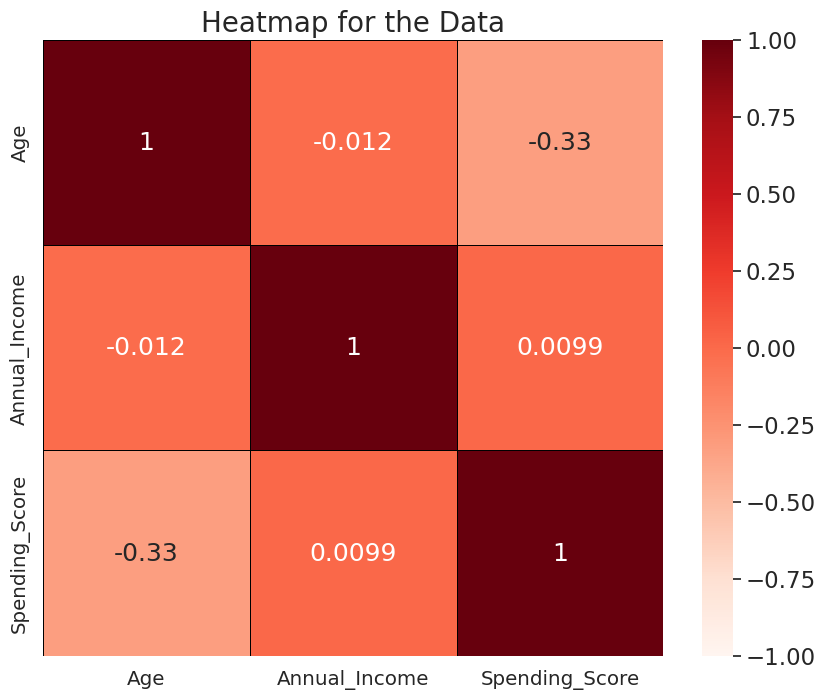

In [ ]:
corr = data[['Age', 'Annual_Income', 'Spending_Score']].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap='Reds', annot=True, linewidths=0.5, linecolor='black',vmin=-1, vmax=1,ax=ax)
plt.title('Heatmap for the Data', fontsize=20)
plt.show()

# **K-MEANS CLUSTERING**

In [ ]:
X = data[['Age', 'Annual_Income', 'Spending_Score']].values


In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)


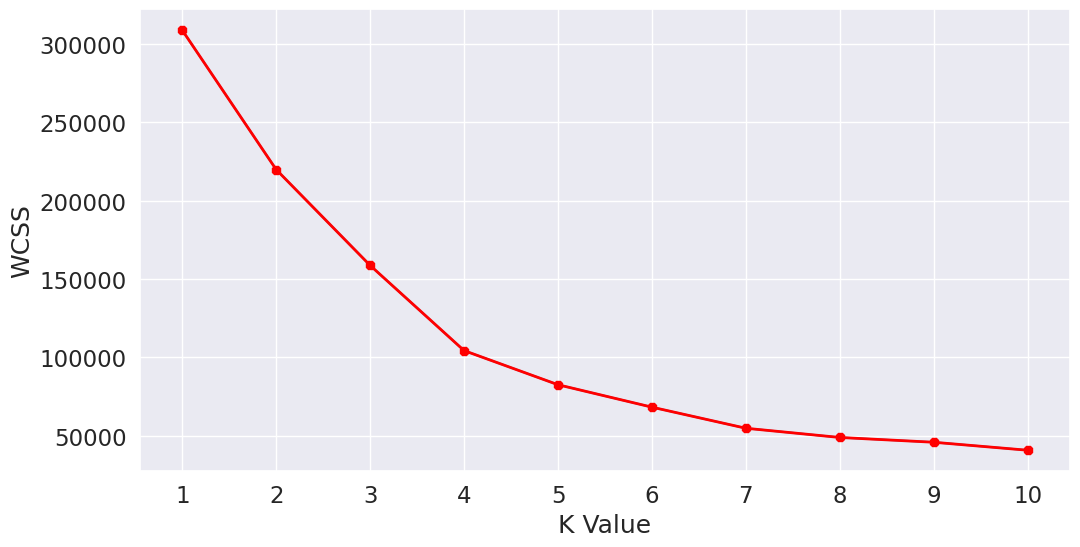

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
km1 = KMeans(n_clusters=5, random_state=42)
km1.fit(X)
y = km1.predict(X)

data["label"] = y
data_filtered = data[["Age", "Annual_Income",
                      "Spending_Score", "label"]]
data_filtered.head()

,Age,Annual_Income,Spending_Score,label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


In [ ]:
X = data[['Annual_Income', 'Spending_Score']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Data Sample:")
print(X_scaled[:5])


Scaled Data Sample:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


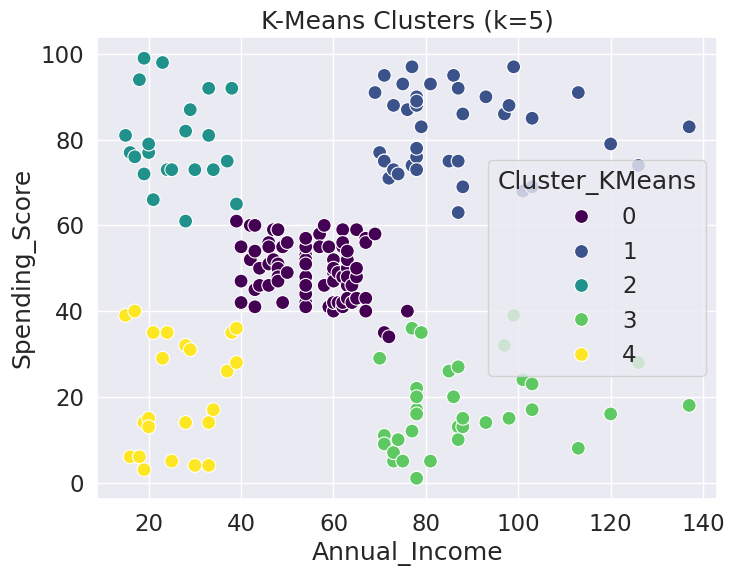

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score',hue='Cluster_KMeans', palette='viridis', s=100)
plt.title("K-Means Clusters (k=5)")
plt.show()

# **Deskripsi Klaster:**
Klaster 0: Pendapatan menengah, pengeluaran menengah (Pelanggan umum)

Klaster 1: Pendapatan tinggi, pengeluaran tinggi (Pelanggan target)

Klaster 2: Pendapatan rendah, pengeluaran tinggi (Pelanggan impulsif)

Klaster 3: Pendapatan tinggi, pengeluaran rendah (Pelanggan berpotensi)

Klaster 4: Pendapatan rendah, pengeluaran rendah (Pelanggan pasif)



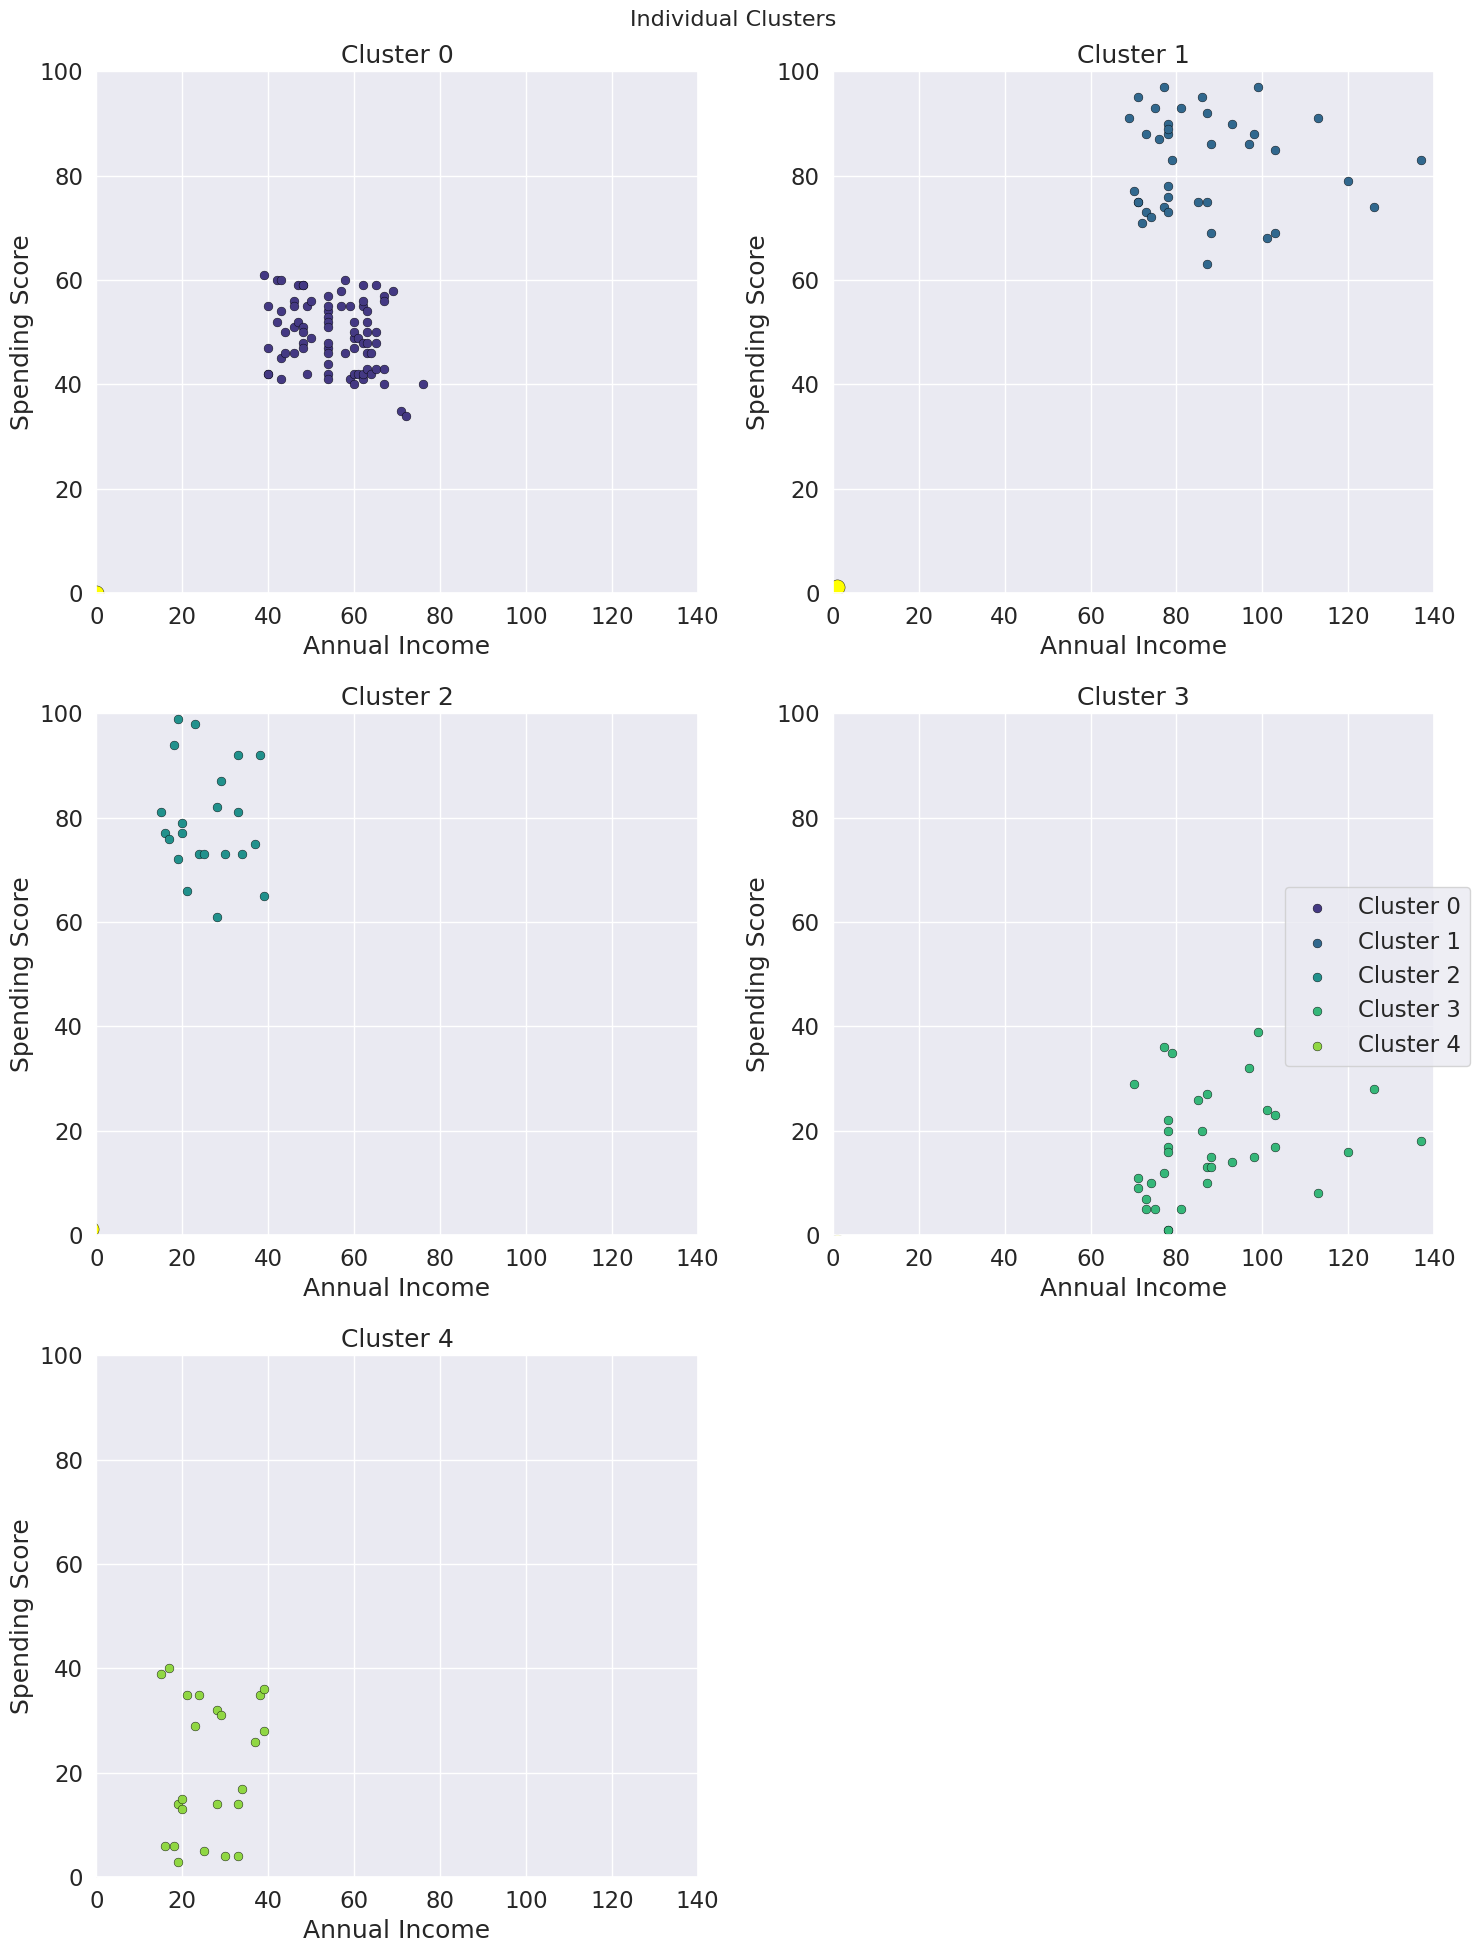

In [ ]:
viridis_colors = sns.color_palette('viridis', 5)

cluster_map = [
    (0, viridis_colors[0], 'Cluster 0'),
    (1, viridis_colors[1], 'Cluster 1'),
    (2, viridis_colors[2], 'Cluster 2'),
    (3, viridis_colors[3], 'Cluster 3'),
    (4, viridis_colors[4], 'Cluster 4')
]

def plot_cluster(ax, data, cluster_num, color, title, centroids):
    ax.scatter(
        data[data['Cluster_KMeans'] == cluster_num]['Annual_Income'],
        data[data['Cluster_KMeans'] == cluster_num]['Spending_Score'],
        s=40, edgecolor='black', linewidth=0.3, c=[color], label=title
    )
    ax.scatter(
        centroids[cluster_num, 0], centroids[cluster_num, 1],
        s=120, c='yellow', edgecolor='black', linewidth=0.3
    )
    ax.set(
        xlim=(0, 140), ylim=(0, 100),
        xlabel='Annual Income', ylabel='Spending Score', title=title
    )

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
positions = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0)]

for pos, (cluster_num, color, title) in zip(positions, cluster_map):
    plot_cluster(ax[pos], data, cluster_num, color, title, kmeans.cluster_centers_)

fig.delaxes(ax[2, 1])

fig.suptitle('Individual Clusters', fontsize=16)
fig.legend(loc='right')
plt.tight_layout()
plt.show()

## Business Insight & Recommendation


Berdasarkan hasil segmentasi pelanggan, ditemukan beberapa kelompok pelanggan dengan karakteristik perilaku yang berbeda. Setiap segmen menunjukkan potensi dan kebutuhan layanan yang berbeda.

Segmen dengan nilai transaksi tinggi namun frekuensi rendah berpotensi ditargetkan melalui penawaran layanan premium. Sementara itu, segmen dengan frekuensi tinggi namun nilai transaksi rendah dapat difokuskan pada peningkatan loyalitas dan bundling layanan.

Hasil analisis ini dapat digunakan sebagai dasar dalam perumusan strategi pemasaran dan penawaran solusi yang lebih tepat sasaran.